# CQF - Exam 1 - Optimal Portfolio Allocation

### Python imports

In [1]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

An investment universe of the following risky assets with a dependency structure (correlation) is given:

In [2]:
assets = pd.DataFrame(
    data=[
        ['A', 0.02, 0.05],
        ['B', 0.07, 0.12],
        ['C', 0.15, 0.17],
        ['D', 0.20, 0.25],
        ], 
    columns=['asset', 'mu', 'sigma'])
assets

,asset,mu,sigma
0,A,0.02,0.05
1,B,0.07,0.12
2,C,0.15,0.17
3,D,0.20,0.25


## Question 1

Consider mininum variance portfolio with a target return $m$


$$\underset{w}{argmin}\frac{1}{2}w^{'}\sum{w}$$

$s.t.$ 

$$w^{'}\mathbf{1} = 1$$

$$\mu_{\pi} = w^{'}\mu = m$$

- Formulate the Lagrangian and give its partial derivatives

<font color='blue'>We form the Lagrange function with tow Lagrange multipliers $\lambda$ and $\gamma$:

$$L(w,\lambda,\gamma) = \frac{1}{2} w^{'}\sum{w} + \lambda(m-w^{'}\mu) + \gamma(1-w^{'}\mathbf{1})$$

with partial derivatives:

$$\frac{\partial{L}}{\partial{w}} = \sum{w} - \lambda\mu - \gamma$$

$$\frac{\partial{L}}{\partial{\lambda}} = m - w^{'}\mu$$

$$\frac{\partial{L}}{\partial{\gamma}} = 1 - w^{'}\mathbf{1}$$

</font>

- Write down the anlytical solution for optimal allocations $w^{*}$ (derivation not required)

<font color='blue'>

$$w^* = \frac{1}{(AC-B^2)} \sum^{-1}[(A\mu-B\mathbf{1})m + (C\mathbf{1}-B\mu)]$$

where:

$$
\begin{equation}
    \begin{cases}
        A=\mathbf{1}^{'}\sum^{-1}\mathbf{1}\\
        B=\mathbf{1}^{'}\sum^{-1}\mu\\
        C=\mu^{'}\sum^{-1}\mu
    \end{cases}
\end{equation}
$$

</font>

- Inverse optmization: generate above $700$ random allocation sets (vectors) 4x1, those will not be optimal allocations.

    Standardize each set to satisfy $w^{'}\mathbf{1} = 1$
    For each vector of allocations compute $\mu_{\pi} = w^{'}\mu$ and $\sigma_{\pi} = \sqrt{w^{'}\sum{w}}$

In [3]:
mu = np.array([0.02, 0.07, 0.15, 0.20])

sigma = np.array([0.05, 0.12, 0.17, 0.25])

R = np.matrix([
        [1.0, 0.3, 0.3, 0.3],
        [0.3, 1.0, 0.6, 0.6],
        [0.3, 0.6, 1.0, 0.6 ],
        [0.3, 0.6, 0.6, 1.0],
        ])

def get_covariance_matrix(sigma, R):
    S = sigma*np.identity(len(sigma))
    return np.dot(np.dot(S, R), S)

<AxesSubplot:xlabel='sigma', ylabel='mu'>

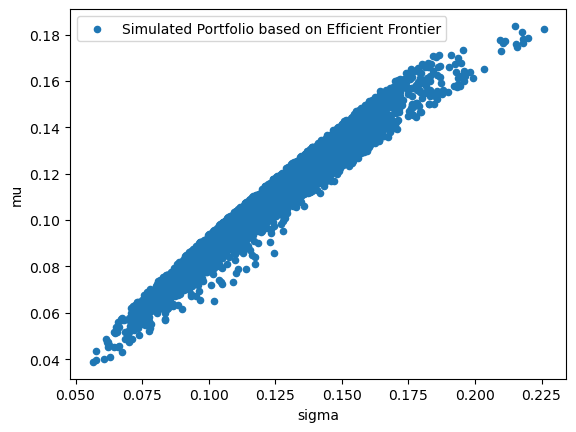

In [4]:
def gen_w(size):
    w = np.array([np.random.uniform() for i in range(0,size,1)])
    return w / w.sum()

n_assets = 4
cases = 5000
W = [gen_w(n_assets) for i in range(0,cases,1)]
cov = get_covariance_matrix(sigma=sigma, R=R)

data = [[np.dot(mu, w),np.sqrt(np.dot(np.dot(w,cov),w).sum())] for w in W]
df_simul = pd.DataFrame(data=data,columns=['mu','sigma'])
df_simul.plot.scatter(x='sigma', y='mu', label='Simulated Portfolio based on Efficient Frontier')

<font color='blue'> 
The plot above shows the efficient frontier based on the simulation of different weighted portfolios simulation of 
</font>

## Question 2

Consider optmization for a tangency portfolio (maximum Sharpe Ratio).

- Formulate optimization expression

<font color='blue'>

$$ \underset{w}{min} \frac{1}{2} w~{'}\sum{w}$$

subject to:

$$r + w^{'}(\mu - r\mathbf{1}) = m$$

</font>

- Formulate Lagrangian function and give its partial derivatives only

<font color='blue'>

As residual of wealth not invested in risky assets will be invested in risk free, the budget constraint has been removed

$$L(x,\lambda) = \frac{1}{2} w^{'} \sum{w} + \lambda(m - r - w^{'}(\mu-r\mathbf{1}))$$

$$\frac{\partial{L}}{\partial{w}} = \sum{w} - \lambda(\mu - r \mathbf{1})$$

<font>

- For the range of tangency portfolios given by $r_f=50bps, 100bps, 150bps, 175bps$ optimal compute allocations (ready formula) and $\sigma_{\pi}$.
 
    Plot the efficient frontier in the presence of a risk-free aset for $r_f=100bps, 175bps$.

<font color='blue'>

The tangencial portfolio alocation $w_t$ is given by:

$$w_{t} = \frac{\sum^{-1}(\mu-r\mathbf{1})}{B - Ar}$$

where its return and standard deviation:

$$ m_t = \frac{C-Br}{B-Ar} $$

$$ \sigma_{t} = \sqrt{\frac{C-2Br+Ar^2}{(B-Ar)^2}} $$

where:

$$
\begin{equation}
    \begin{cases}
        A=\mathbf{1}^{'}\sum^{-1}\mathbf{1}\\
        B=\mathbf{1}^{'}\sum^{-1}\mu\\
        C=\mu^{'}\sum^{-1}\mu
    \end{cases}
\end{equation}
$$

<font>

In [5]:
def calculate_tangency_portfolio(mu, sigma, R, r_f):

    m_cov = get_covariance_matrix(sigma=sigma, R=R)
    v_ones = np.ones(len(m_cov))
    m_cov_inv = np.linalg.inv(m_cov)
    A = m_cov_inv.sum()
    B = np.dot(np.dot(v_ones, m_cov_inv), mu).sum()
    C = np.dot(np.dot(mu, m_cov_inv), mu).sum()

    den = (B-A*r_f)
    w_t = np.dot(m_cov_inv,mu - r_f) / den
    m_t = (C - B*r_f) / den
    sigma_t = np.sqrt((C - 2*B*r_f + A*(r_f**2))/(den**2))

    return w_t, m_t, sigma_t

In [28]:
mu = np.array([0.02, 0.07, 0.15, 0.20])

sigma = np.array([0.05, 0.12, 0.17, 0.25])

R = np.matrix([
        [1.0, 0.3, 0.3, 0.3],
        [0.3, 1.0, 0.6, 0.6],
        [0.3, 0.6, 1.0, 0.6 ],
        [0.3, 0.6, 0.6, 1.0],
        ])

df_pt = pd.DataFrame(data=[0.005, 0.01, 0.015, 0.0175], columns=['r_f'])
df_pt['w_t'], df_pt['m_t'], df_pt['sigma_t'] = zip(*df_pt.r_f.apply(lambda x: calculate_tangency_portfolio(mu=mu, sigma=sigma, R=R, r_f=x)))
df_pt[['r_f', 'w_t', 'sigma_t']]

,r_f,w_t,sigma_t
0,0.0050,[[[[[ 0.0168352 -0.22936698 0.81434026 0.39...,0.196511
1,0.0100,[[[[[-0.74593711 -0.51056937 1.49024934 0.76...,0.350665
2,0.0150,[[[[[-8.64485405 -3.42257114 8.48965087 4.57...,1.972392
3,0.0175,[[[[[ 8.10350247 2.75185052 -6.3514309 -3.50...,1.473515


Text(0, 0.5, 'm_t')

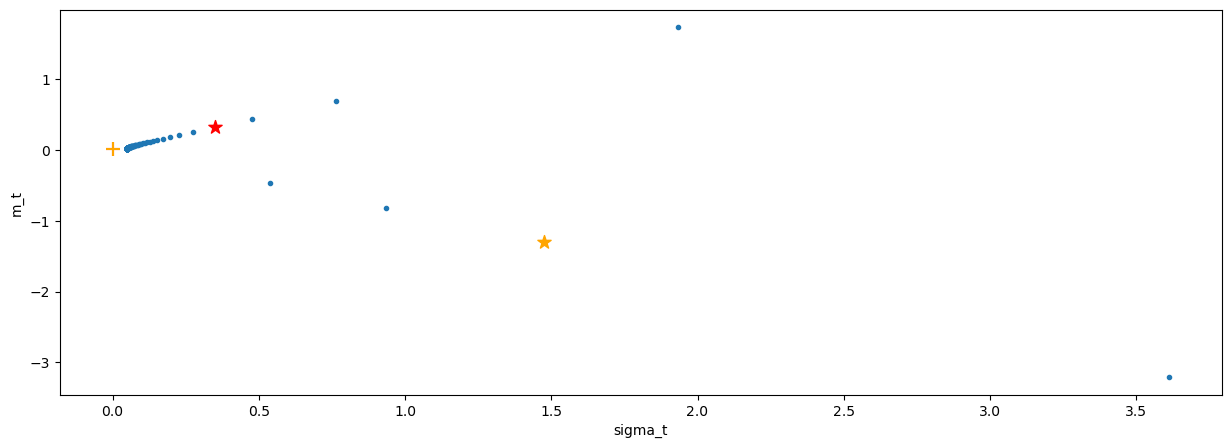

In [7]:
rs = np.linspace(-5,0.02, 3000)
mus = np.zeros(len(rs))
sigmas = np.zeros(len(rs))
for i in range(0, len(rs), 1):
    w, m, s = calculate_tangency_portfolio(mu=mu, sigma=sigma, R=R, r_f=rs[i])
    mus[i] = m
    sigmas[i] = s

plt.subplots(figsize=[15,5])
plt.scatter(sigmas, mus, marker='.')

df_100bps = df_pt[df_pt['r_f'] == 0.01]
df_175bps = df_pt[df_pt['r_f'] == 0.0175]

plt.scatter(df_100bps.iloc[0].sigma_t, df_100bps.iloc[0].m_t, marker='*', color='red', s=100)
plt.scatter(0, 0.01, marker='+', color='red', s=100)
plt.scatter(df_175bps.iloc[0].sigma_t, df_175bps.iloc[0].m_t, marker='*', color='orange', s=100)
plt.scatter(0, 0.0175, marker='+', color='orange', s=100)

plt.xlabel('sigma_t')
plt.ylabel('m_t')

In [8]:
# Annotations example

mu = np.array([0.05, 0.07, 0.15, 0.27])

sigma = np.array([0.07, 0.12, 0.3, 0.6])

R = np.matrix([
    [1.0,0.8,0.5,0.4],
    [0.8,1.0,0.7,0.5],
    [0.5,0.7,1.0,0.8],
    [0.4,0.5,0.8,1.0]])

w_t, mu_t, sigma_t = calculate_tangency_portfolio(mu=mu, sigma=sigma, R=R, r_f=0.0175)

## Question 3

Implement the multi-step binomial method as described in Binomial Method lecture with the following variables and parameters: sotck $S = 100$, interset rate $r = 0.05$ (continuously compounded) for a call option s with strike $E=100$, and maturity $T =1$.

- Use any suitable parametrisation for up and down moves $uS$, $vS$.

- Compute the options value for a range of volatilities $[0.05,...,0.8]$ and plot the result. Set trees to have a minimum four time steps.

- Now, compute and plot the value of one options, $\sigma_{imp} - 0.2$ as you increase the number of time steps $NTS = 4, 5, ..., 50$.

In [9]:
S = 100
r = 0.05
K = 100
T = 1
N = 4

def combinat(n, i):
    return math.factorial(n) / (math.factorial(n-i)*math.factorial(i))

def opt_binomial(S0, K, T, r, sigma, N, CP):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = np.exp(-sigma * np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    value = 0
    for i in range(N+1):
        prob = combinat(N, i)*(p**i)*((1-p)**(N-i))
        ST = S0*(u**i)*(d**(N-i))
        if CP == 'C':
            value += max(ST-K, 0) * prob
        else:
            value += max(K-ST, 0) * prob

    return value*np.exp(-r*T)

Text(0, 0.5, 'option price')

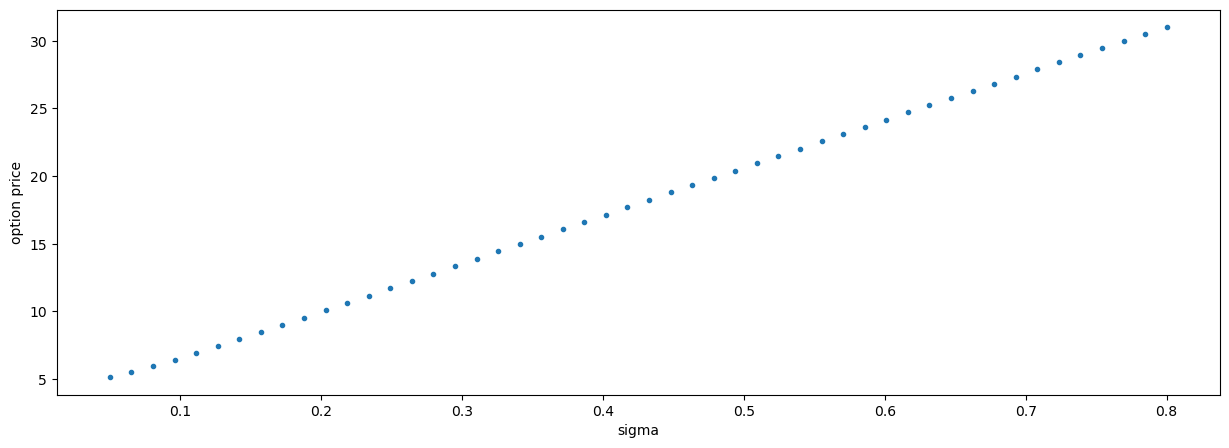

In [10]:
sigmas = np.linspace(0.05, 0.80)

prices = []
for sigma in sigmas:
    prices.append(opt_binomial(S0=S, K=K, T=T, r=r, sigma=sigma, N=N, CP='C'))

plt.subplots(figsize=[15,5])
plt.scatter(sigmas, prices, marker='.')

plt.xlabel('sigma')
plt.ylabel('option price')

Text(0, 0.5, 'option price')

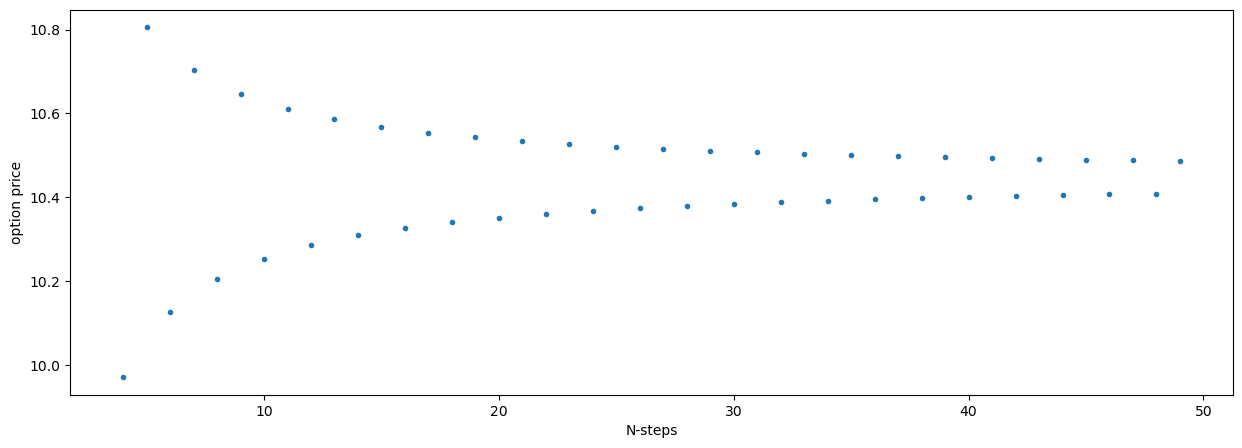

In [11]:
ns = list(range(4, 50, 1))

prices = []
for n in ns:
    prices.append(opt_binomial(S0=S, K=K, T=T, r=r, sigma=0.2, N=n, CP='C'))

plt.subplots(figsize=[15,5])
plt.scatter(ns, prices, marker='.')

plt.xlabel('N-steps')
plt.ylabel('option price')

## Question 4

Use the ready formula for Expected Shortfall in order to compute the standardised value of Expected Shortfall for $N(0,1)$.

- Compute for the following range of percentiles $[99.95; 99.75; 99.5; 99.25; 99; 98.5; 98; 97.5]$

- The formula to use, and $1-c$ refers to $1-99.95$ and so on,

$$ES_{c}(X) = \mu - \sigma \frac{\phi(\Phi^{-1}(1-c))}{1-c}$$

Text(0, 0.5, 'expected shortfall')

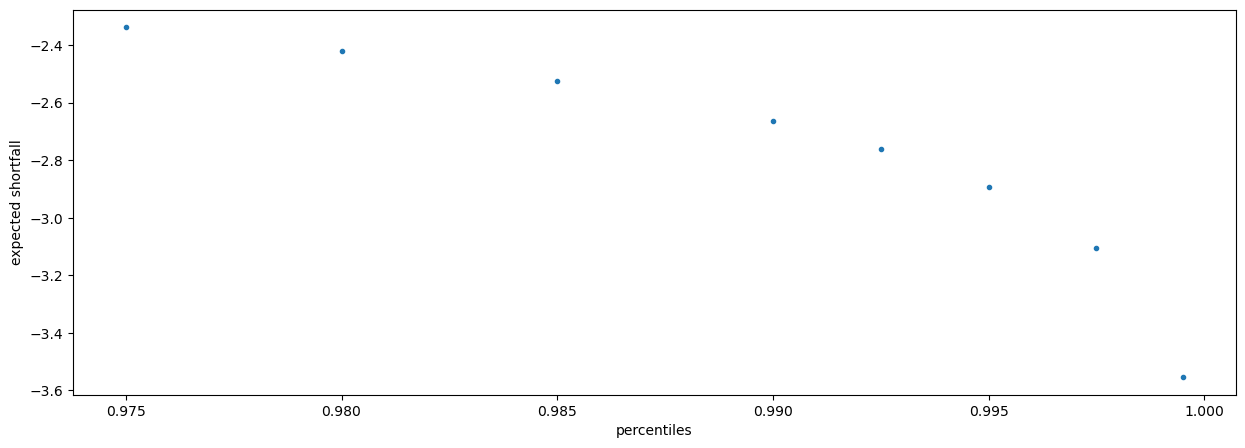

In [12]:
alpha = 1-0.995

def ExpectedShortfall(mu, sigma, percentil):
    alpha = 1.0 - percentil
    return mu - (sigma*(norm.pdf(norm.ppf(alpha)))) / alpha

mu = 0
sigma = 1
percentiles = [0.9995, 0.9975, 0.995, 0.9925, 0.99, 0.985, 0.98, 0.975]
ess = []
for percentile in percentiles:
    es = ExpectedShortfall(mu=mu, sigma=sigma, percentil=percentile)
    ess.append(es)

plt.subplots(figsize=[15,5])
plt.scatter(percentiles, ess, marker='.')

plt.xlabel('percentiles')
plt.ylabel('expected shortfall')

## Question 5

In [102]:
df = pd.read_csv('Data_SP500.csv', skiprows=1, names=['date', 'close'])
#df = pd.read_excel(r'C:\Users\fbris\Downloads\CQF_January_2023_M2L3_Excel (1).xlsm', sheet_name='DATA', usecols='A:B', header=None, names=['date', 'close'])
df['log_return'] = (np.log(df.close) - np.log(df.close.shift(1)))
df['log_return_10d'] = (np.log(df.close) - np.log(df.close.shift(10)))
df['log_return_21d'] = (np.log(df.close) - np.log(df.close.shift(21)))
df['sigma'] = df.log_return.rolling(21).std()
df['sigma_10d'] = df.sigma * np.sqrt(10)
df['var10d'] = df.sigma_10d * norm.ppf(0.01)
df['breaches'] = df.log_return_10d < df.var10d

result = df[['log_return_10d','var10d','breaches']].dropna()
breaches = result[result.breaches]

In [103]:
print(rf'Breaches: {len(breaches)} - {len(result):.2%}')

Breaches: 3 - 122900.00%


In [104]:
consecutives_breaches = breaches.index[1:] - breaches.index[:-1]
total_consecutive_breaches = consecutives_breaches.value_counts()[1]
print(rf'Consecutive Breaches: {total_consecutive_breaches} - {total_consecutive_breaches/len(breaches):.2%}')

Consecutive Breaches: 1 - 33.33%


<AxesSubplot:xlabel='index', ylabel='var10d'>

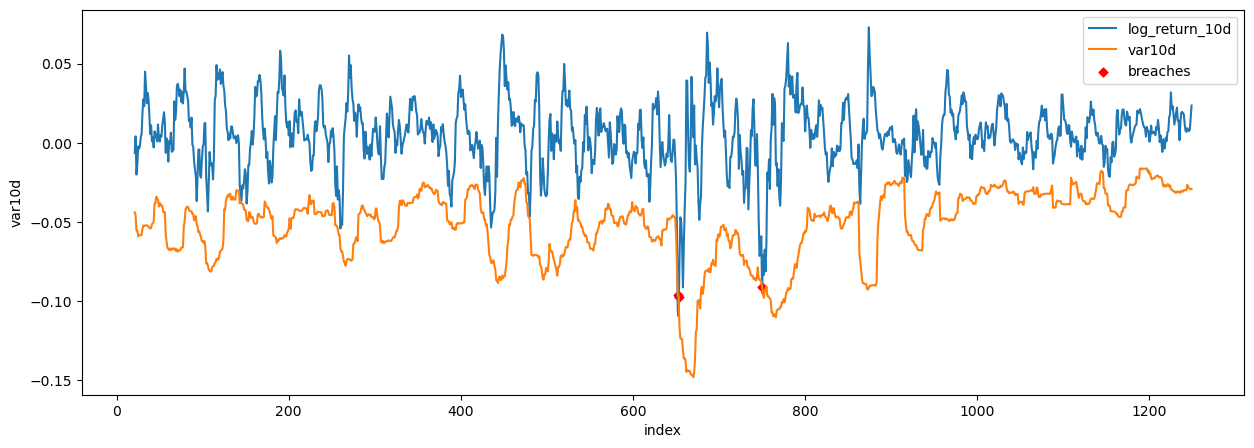

In [105]:
ax = df[['log_return_10d','var10d']].dropna().plot(figsize=[15,5])
breaches.reset_index().plot.scatter(ax = ax, x='index', y='var10d', color='r', marker='D', label='breaches')

## Question 6

In [18]:
ewma_lambda = 0.72
df['ewma_weights'] = np.arange(len(df.log_return.dropna()), -1, -1)
df['ewma_exp'] = np.power(ewma_lambda, df.ewma_weights) * (1-ewma_lambda)
df['ewma_product'] = df.ewma_exp * df.log_return ** 2

In [19]:
ewma_sigma = np.sqrt(df.ewma_product.sum())
ewma_sigma

ewma_var =  ewma_sigma * norm.ppf(0.01)
ewma_var10d = ewma_var * np.sqrt(10)
ewma_var10d

-0.04229802048136311

In [20]:
ewma_breaches = df[df.log_return_10d < ewma_var10d]

ewma_total_breaches = len(ewma_breaches)
ewma_total_returns = len(df.log_return_10d.dropna())

print(rf'Breaches: {ewma_total_breaches} - {ewma_total_breaches/ewma_total_returns:.2%}')

Breaches: 30 - 2.42%


In [21]:
ewma_consecutives_breaches = ewma_breaches.index[1:] - ewma_breaches.index[:-1]
ewma_total_consecutive_breaches = ewma_consecutives_breaches.value_counts()[1]
print(rf'Consecutive Breaches: {ewma_total_consecutive_breaches} - {ewma_total_consecutive_breaches/ewma_total_breaches:.2%}')

Consecutive Breaches: 23 - 76.67%


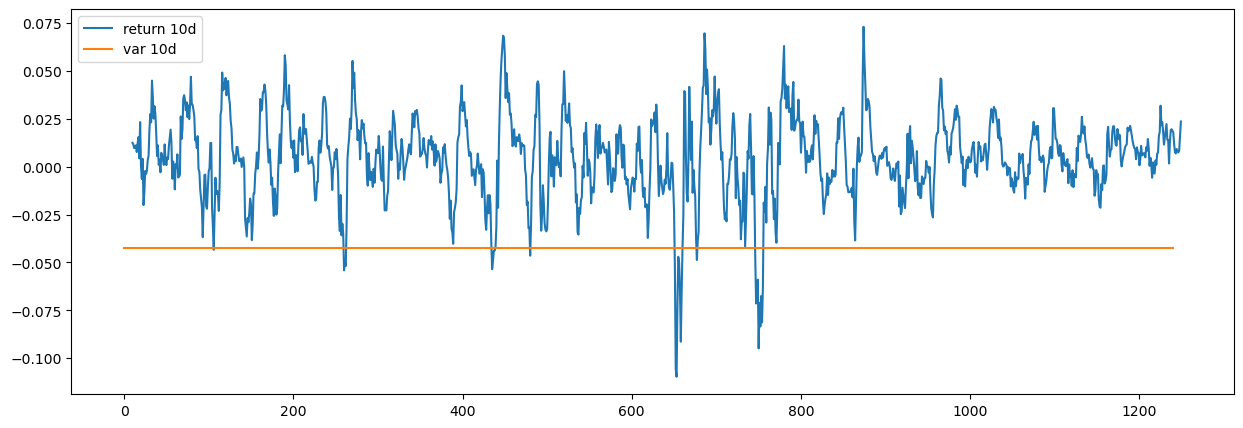

In [22]:
rt10d  = df.log_return_10d.dropna()
plt.subplots(figsize=[15,5])
plt.plot(rt10d.index, rt10d, label='return 10d')
plt.plot([0,len(rt10d.index)],[ewma_var10d, ewma_var10d], label='var 10d')
plt.legend(loc='upper left')